In [1]:
#Import Libraries

!pip install yellowbrick
import pandas as pd

# import feature selection module for chi2(class) 
from sklearn.feature_selection import SelectKBest, chi2, RFE 
#To perform hypothessis of chi2 on independent feature with target column we need one function which is selectkBest
# selectKBest, Chi2 for univariate selection
#RFE for Recurssive feature elimination

import sklearn.linear_model import LogisticRegression
import sklearn.tree import DecisionTreeClassifier

# import yellowbrick for RFE. It gives graphical representation also
from yellowbrick.model_selection import rfecv

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', index_col=0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Define x and y

In [4]:
x = df.iloc[:,:-1]
y = df['class']

In [5]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Univariate Selection

- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. 
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [6]:
#Chi square for feature selection

In [7]:
test = SelectKBest(score_func=chi2, k=5)
# To use this class we need to create one instance/variable
# K -> no. of important features
#This value does not affect the output but we have to mention it otherwise we got an error
# score_func -> which test you want to apply mention that test here

In [8]:
test.fit(x,y)
# Fit function calculate obeserved frequency, expected frequency, Chi2 statistic value, critical value

SelectKBest(k=5, score_func=<function chi2 at 0x0000001B6A6BA160>)

In [9]:
test.scores_
# Scores_ is in built function given by selectKBest class
# Gives test statistic value for all column

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [ ]:
x.columns # Gives all column names

In [ ]:
pd.DataFrame({'Features':x.columns,
             'test':test.scores_})

In [10]:
chi_test = pd.DataFrame(test.scores_).T
# T means transpose

chi_test.columns = x.columns
# .columns function used to give name of column over index number

In [11]:
chi_test

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


- For chi2 test, Test column is more important, 2nd most important column is plasa, so on

- In feature selection ,we have to deal with multiple approches. 

Beacause for different algorithm we got differnt output. Chi2 says test column is most important, RFE says plasa column is most important, DT days age column most important. Select majority

## Recursive Feature Elimination

In [12]:
#RFE with logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
rfe = RFE(LogisticRegression())
# More reliable method. It tells that which column is more important from all columns

In [15]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [ ]:
rfe = rfecv(LogisticRegression(),x,y)
#Create Logistic regression model with x and y
# On x -axis we have no. of column and on y-axis we have accuracy
# Dotted line represent where we got maximum accuracy

In [ ]:
rfe.ranking_
# Give rank based on importance of column

In [16]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1,1,3,4,5,1,1,2


In [ ]:
rfe_df[rfe_df['Ranking']==1] # Pandas filtering
# We extract important column only

# RFE with Decision Tree 

In [24]:
from sklearn.tree import DecisionTreeClassifier

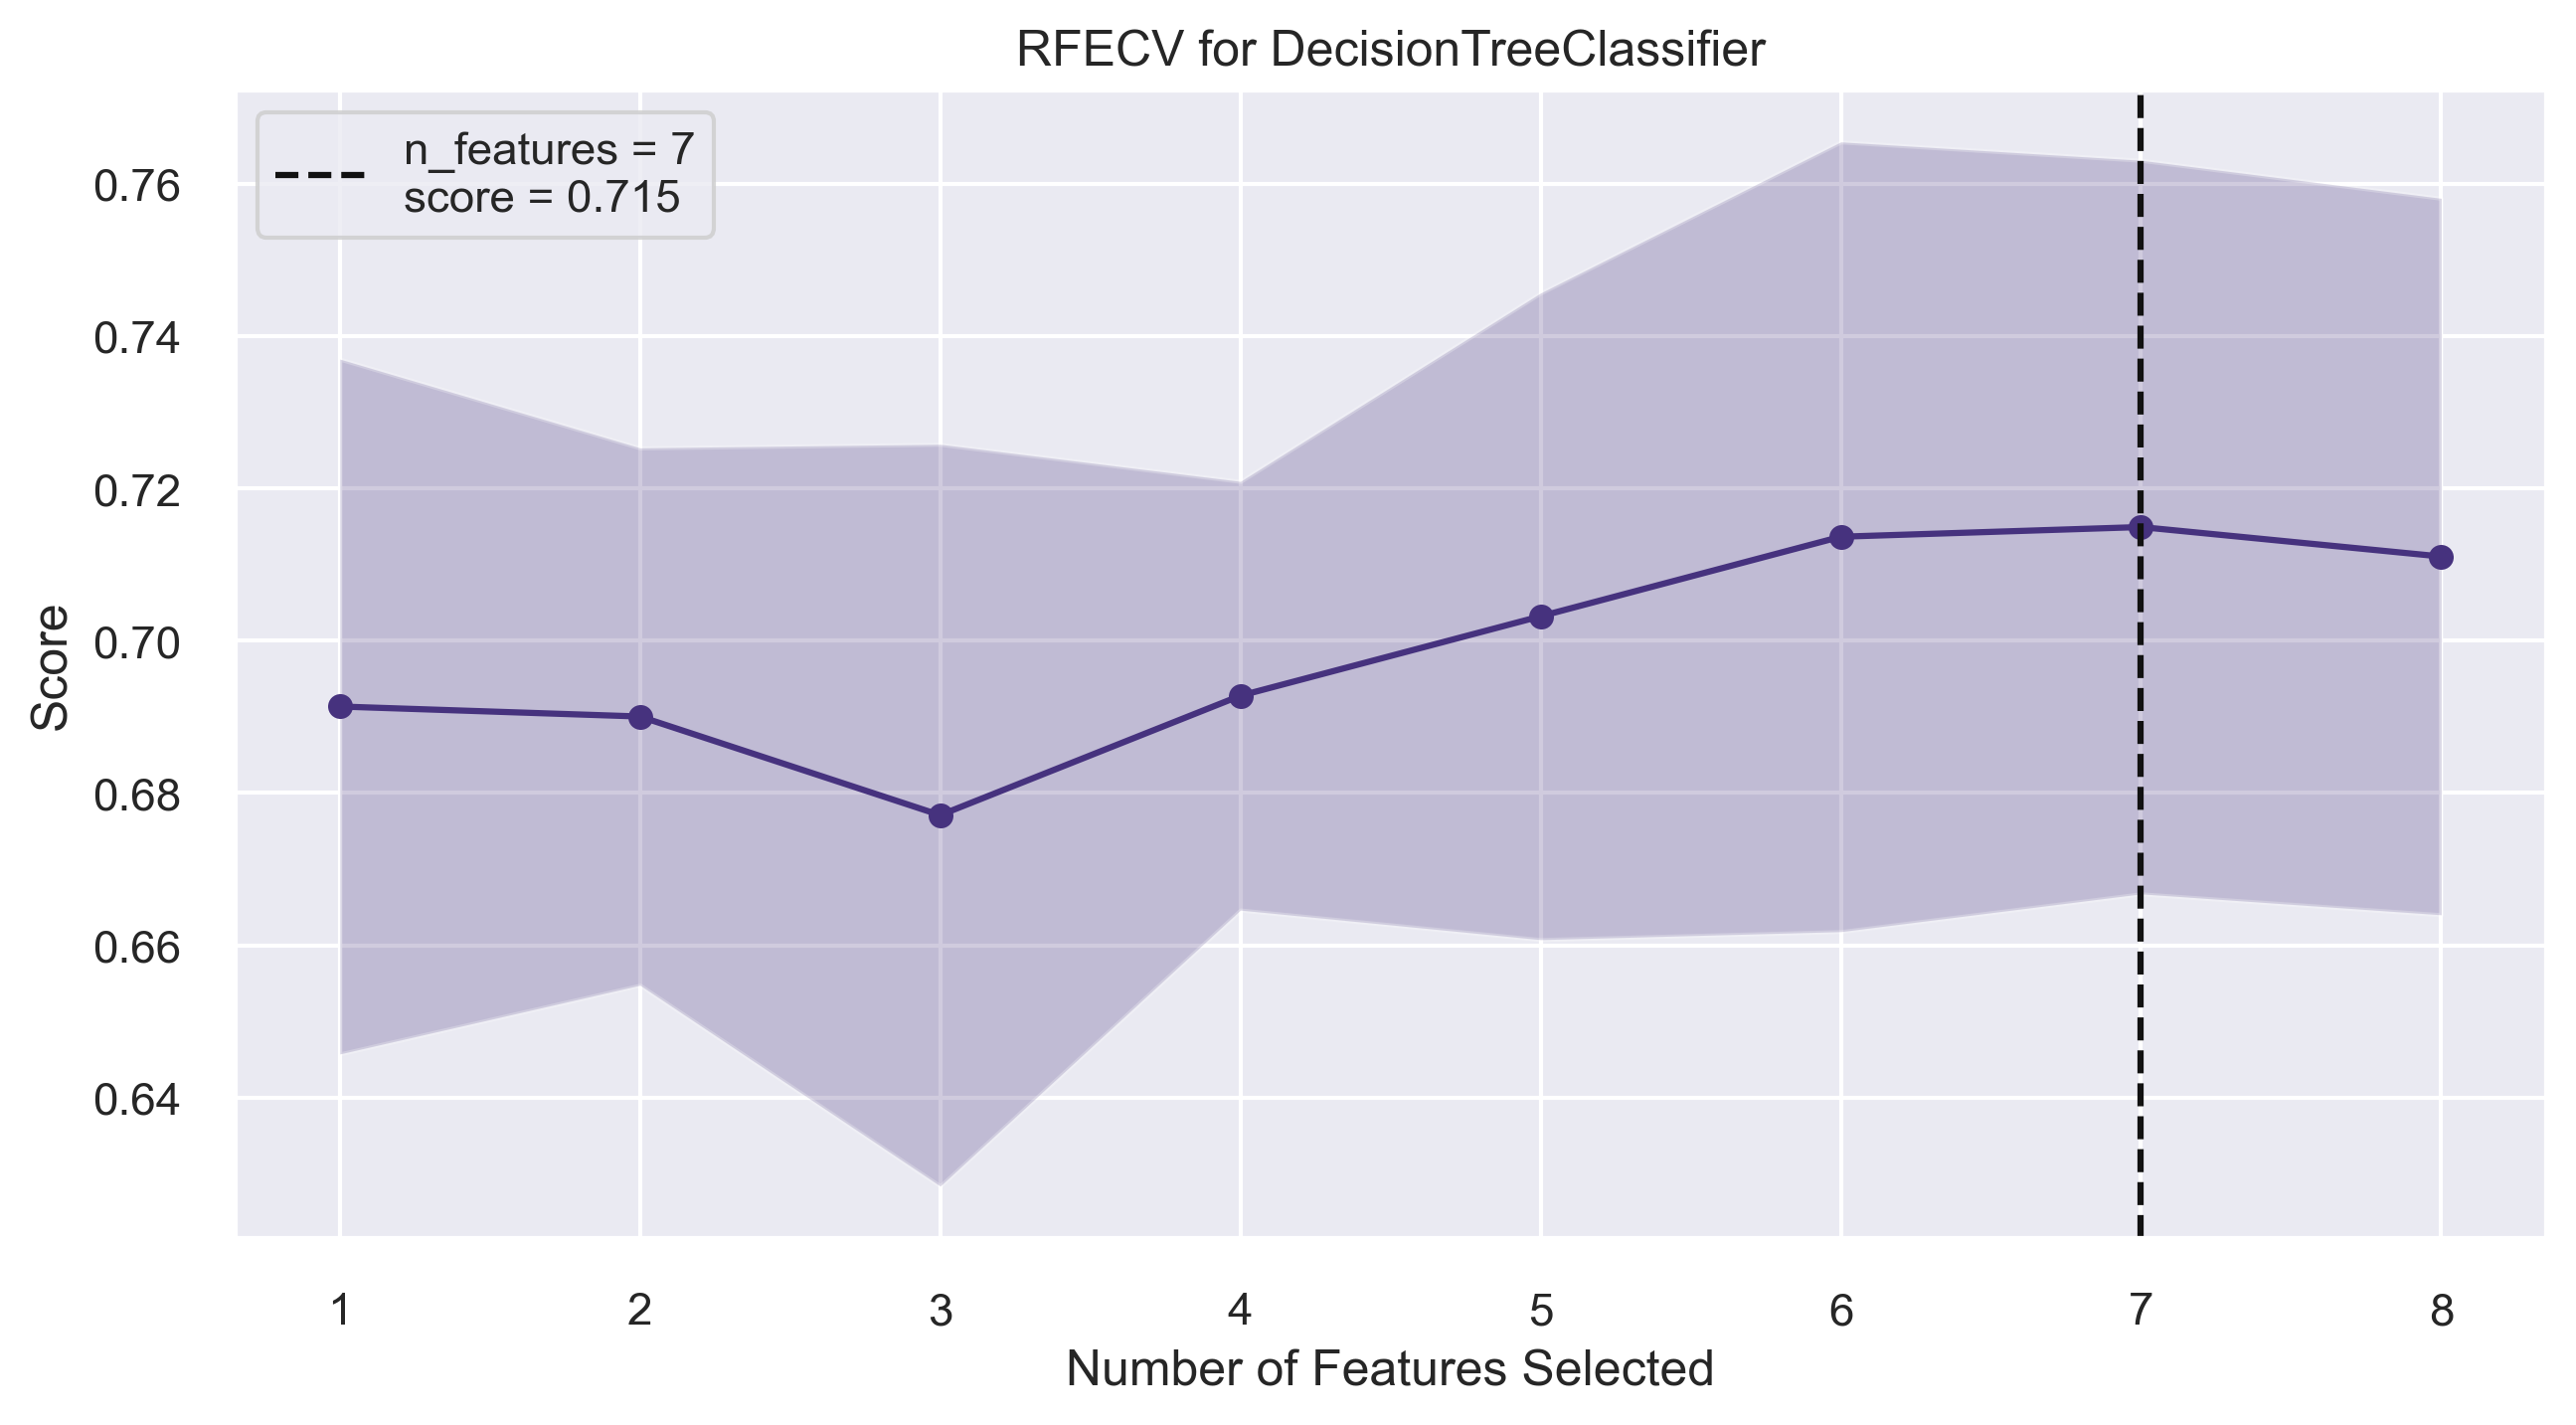

In [25]:
rfe_dt = rfecv(DecisionTreeClassifier(),x,y)

In [26]:
rfe_dt.ranking_

array([1, 1, 1, 2, 1, 1, 1, 1])

In [27]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe_dt.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,preg
1,1,plas
2,1,pres
3,2,skin
4,1,test
5,1,mass
6,1,pedi
7,1,age


In [28]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,preg
1,1,plas
2,1,pres
4,1,test
5,1,mass
6,1,pedi
7,1,age


## Tree Based method

In [29]:
#Tree Based method

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [31]:
dt.feature_importances_
# Information gain 

array([0.07995579, 0.32603252, 0.10379686, 0.01847635, 0.03233839,
       0.21544805, 0.11715072, 0.10680133])

In [32]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

In [33]:
imp_cols
# Column with information gain

,Features,IG
0,preg,0.079956
1,plas,0.326033
2,pres,0.103797
3,skin,0.018476
4,test,0.032338
5,mass,0.215448
6,pedi,0.117151
7,age,0.106801


In [34]:
imp_cols.sort_values(by = 'IG', ascending=False) #Sort values to better view

,Features,IG
1,plas,0.326033
5,mass,0.215448
6,pedi,0.117151
7,age,0.106801
2,pres,0.103797
0,preg,0.079956
4,test,0.032338
3,skin,0.018476


- Plasma is most important column, 2nd mass is most important column
- test column is not important

**Two algorithm says test column is not important. so don't select this column**

# In-Class Activity:

1. Perform Feature selection(Chi2, RFE, Tree Based) on Wine dataset.

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [36]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [37]:
test = SelectKBest(score_func=chi2, k= 10)

In [38]:
test.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x0000001B6A6BA160>)

In [39]:
test.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

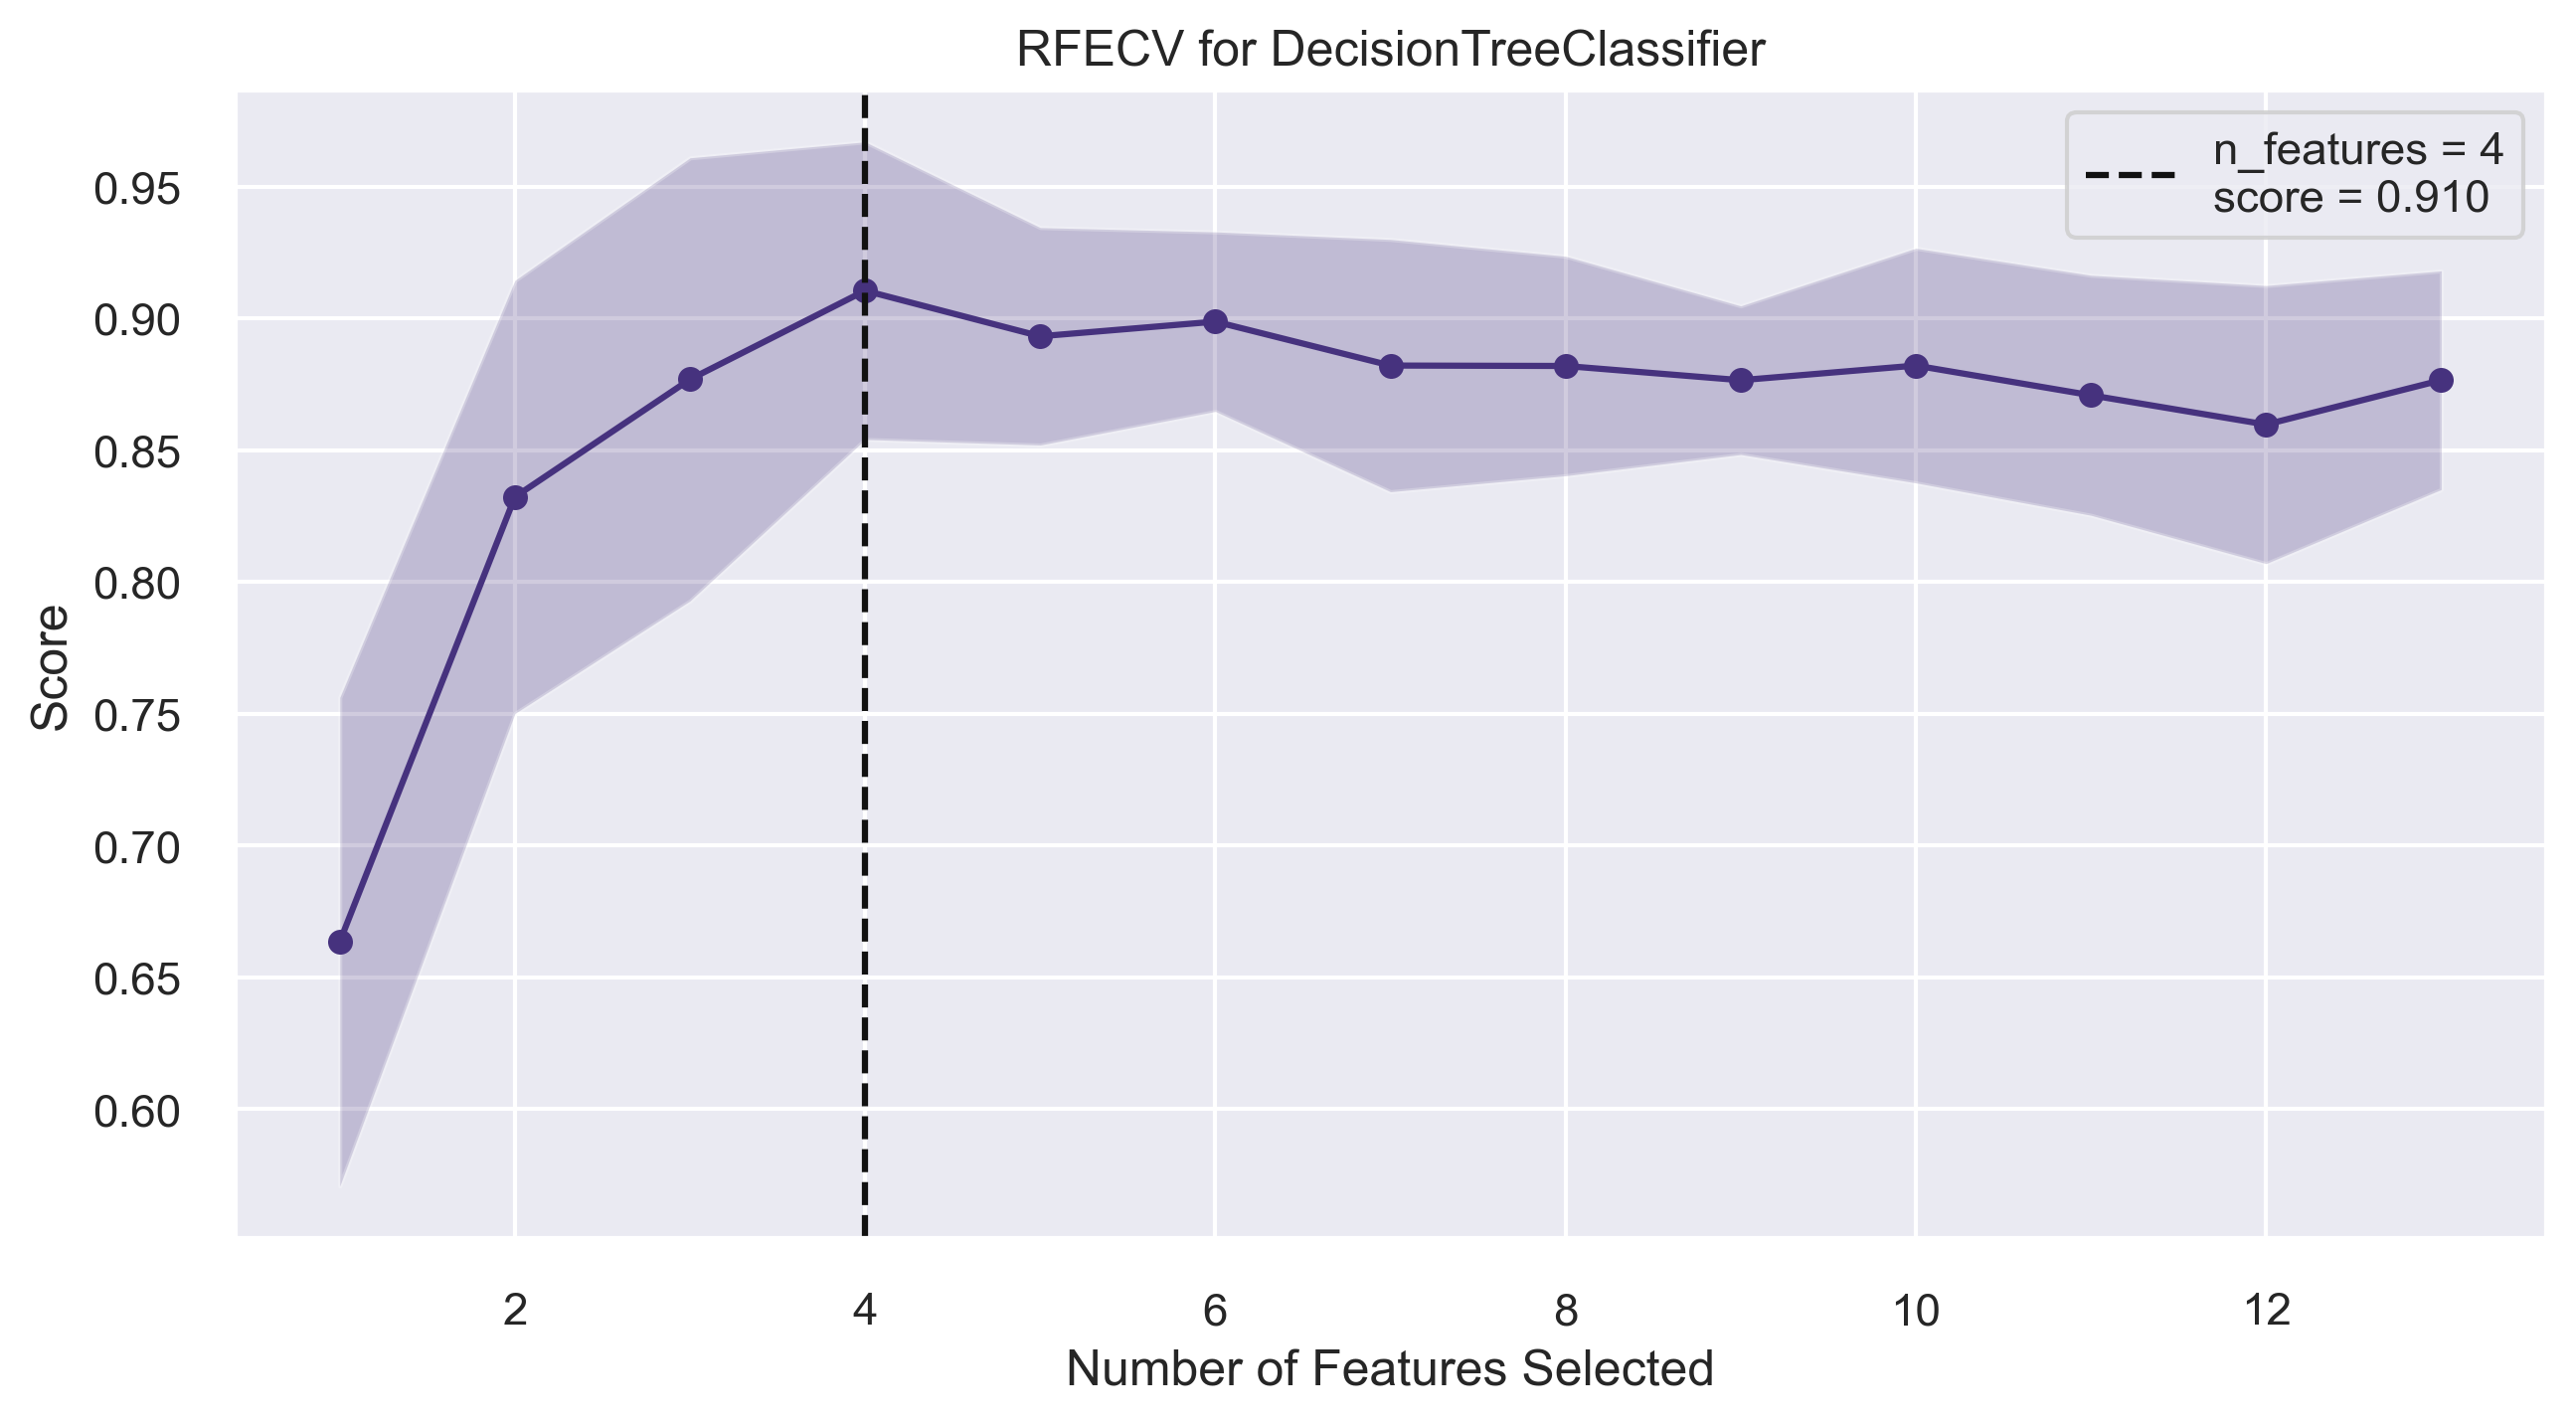

In [40]:
rfe = rfecv(DecisionTreeClassifier(),x,y)

In [41]:
rfe.ranking_

array([ 3, 10,  9,  8,  5,  7,  1,  6,  4,  2,  1,  1,  1])

In [42]:
x.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [44]:
dt.feature_importances_

array([0.02679372, 0.02048135, 0.        , 0.        , 0.03297845,
       0.        , 0.16704836, 0.        , 0.        , 0.        ,
       0.05818509, 0.31204257, 0.38247045])